## Multiple Classifiers

Goal:
increase sales by properly segmenting the customers into diffirent categories
e.g. loyal customers, potential customer, fence sitter etc.

X Features:
- Frequency: The numner of purchases made by the customer
- Recency: How recently the customer bought from the online retailer (in days)
- MonetrayValue: The total amount spend by the customer between 2010 and 2011
- Tenure: How long the customer has been associated with the retials (in days)

Y Segments: which segmet the customer belongs to

In [1]:
# import libraries

import pandas as pd
import numpy as np
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import LinearSVC
segmentation = pd.read_csv('Segmentation.csv')
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     3046 non-null   int64  
 1   Recency        3046 non-null   int64  
 2   Tenure         3046 non-null   int64  
 3   Frequency      3046 non-null   int64  
 4   MonetaryValue  3046 non-null   float64
 5   Segment        3046 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 142.9+ KB


In [2]:
# split into features and target:

X = segmentation.iloc[:, 1:5]
# X = segmentation.drop(["CustomerID","Segment"],axis=1)

y = segmentation.iloc[:, 5]
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3046 entries, 0 to 3045
Series name: Segment
Non-Null Count  Dtype 
--------------  ----- 
3046 non-null   object
dtypes: object(1)
memory usage: 23.9+ KB


### One VS Rest Classifier

- One-vs-rest (OvR for short, also referred to as One-vs-All or OvA) is a heuristic method for using binary classification algorithms for multi-class classification.
- It involves splitting the multi-class dataset into multiple binary classification problems. A binary classifier is then trained on each binary classification problem and predictions are made using the model that is the most confident.
- e.g., Binary Classification Problem 1: red vs [blue, green]
- Binary Classification Problem 2: blue vs [red, green]
- Binary Classification Problem 3: green vs [red, blue]


In [3]:
# use One VS Rest (in this case, both training and testing dataset are the same)
OneVsRestClassifier(LinearSVC(random_state=0)).fit(X,y).predict(X)

/Users/paipufei/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/paipufei/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/paipufei/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array(['Fence Sitter', 'Potential', 'Fence Sitter', ..., 'Potential',
       'Potential', 'Potential'], dtype='<U12')

### One VS One Classfier

- One-vs-One (OvO for short) is another heuristic method for using binary classification algorithms for multi-class classification.

- Like one-vs-rest, one-vs-one splits a multi-class classification dataset into binary classification problems. Unlike one-vs-rest that splits it into one binary dataset for each class, the one-vs-one approach splits the dataset into one dataset for each class versus every other class.

- e.g., Binary Classification Problem 1: red vs. blue; Binary Classification Problem 2: red vs. green

In [4]:
# use One VS One Classifier
y_pred = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X,y).predict(X)

/Users/paipufei/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/paipufei/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/paipufei/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Note: computation time varies between two approaches
based on the system configuration and the number of ongoing processes. This makes
it an unreliable performance metric.

### Performance Metrics
- The performance metrics in the case of multiclass classification would be the same as what you sed for bunery classification in the previous chapter: Precision, Recall and F1 score, obtained using a confusion matrix
- If the data can be inbalanced, use micro'

In [5]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y, y_pred, average = 'micro')
# precision, recall, F1 score

(0.8913328956007879, 0.8913328956007879, 0.8913328956007879, None)

In [6]:
precision_recall_fscore_support(y, y_pred, average = 'macro')

(0.8953482728292116, 0.8398631601909448, 0.8611056747996616, None)

## Decision Tree Classifier

In [7]:
# import libraries

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, \
confusion_matrix, \
accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [8]:
segmentation = pd.read_csv('Segmentation.csv')

In [9]:
segmentation.head()

,CustomerID,Recency,Tenure,Frequency,MonetaryValue,Segment
0,12346,326,326,2,0.00,Fence Sitter
1,12349,19,19,73,1757.55,Potential
2,12350,310,310,17,334.40,Fence Sitter
3,12353,204,204,4,89.00,Fence Sitter
4,12354,232,232,58,1079.40,Fence Sitter


In [10]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     3046 non-null   int64  
 1   Recency        3046 non-null   int64  
 2   Tenure         3046 non-null   int64  
 3   Frequency      3046 non-null   int64  
 4   MonetaryValue  3046 non-null   float64
 5   Segment        3046 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 142.9+ KB


In [11]:
segmentation['Segment'].value_counts()

Potential       1587
Fence Sitter    1030
Loyal            429
Name: Segment, dtype: int64

In [12]:
X = segmentation.iloc[:, 1:5]
# X = segmentation.drop(["CustomerID","Segment"],axis=1)

y = segmentation.iloc[:, 5]
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 3046 entries, 0 to 3045
Series name: Segment
Non-Null Count  Dtype 
--------------  ----- 
3046 non-null   object
dtypes: object(1)
memory usage: 23.9+ KB


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
# stratify=y > returns training and test subsets that have the same proportions of class labels as the input dataset

In [14]:
model = DecisionTreeClassifier()
clf = model.fit(X_train, y_train)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
# performance metrics: represent the precision, recall, F1 score, and support metrics, respectively (a variation of 5% is acceptable
precision_recall_fscore_support(y_test, y_pred, average='macro')
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.9950819672131147, 0.9950819672131147, 0.9950819672131147, None)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

Fence Sitter       1.00      1.00      1.00       206
       Loyal       0.99      1.00      0.99        86
   Potential       1.00      0.99      1.00       318

    accuracy                           1.00       610
   macro avg       0.99      1.00      0.99       610
weighted avg       1.00      1.00      1.00       610



- From the preceding classification report:
- When using microaveraging, since each of the classes is equally weighted, we get similar scores
- For precision, recall, and F1, macro-averaging gives weightage to the most frequent class labels, resulting in different scores

## Random Forest Classifier

In [18]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,\
confusion_matrix,\
accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot

mkt = pd.read_csv('MarketingData.csv')
mkt.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2
1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2
2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2
3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0
4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2


In [19]:
X = mkt.iloc[:, 1:6]
# X = segmentation.drop(["CustomerID","Segment"],axis=1)

y = mkt.iloc[:, 6]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Milk              20000 non-null  float64
 1   Grocery           20000 non-null  float64
 2   Frozen            20000 non-null  float64
 3   Detergents_Paper  20000 non-null  float64
 4   Delicassen        20000 non-null  float64
dtypes: float64(5)
memory usage: 781.4 KB


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
# stratify=y > returns training and test subsets that have the same proportions of class labels as the input dataset

In [21]:
X_test

,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
6278,5698.091375,4754.952302,5925.389521,6254.109244,5177.428703
692,3842.226682,4342.343821,2813.200362,3326.686664,4725.232898
4291,6080.288212,6123.520569,5535.590406,3856.021594,7780.724099
6829,5008.985250,5811.402970,5141.232819,5690.638008,5051.818949
18435,5199.409461,2839.616624,5853.274119,7347.433352,4306.818996
...,...,...,...,...,...
14896,6249.792014,6664.518217,5972.724071,5468.278828,4976.380237
8975,4362.701602,6961.144041,3567.015478,2670.468345,7349.541312
1628,5819.142578,4022.863164,5334.807272,5150.815639,5052.335984
12741,7279.813890,3336.712106,6852.508531,4764.665422,8226.039603


In [22]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=7, random_state=0)

In [23]:
clf_random_fitted = clf_random.fit(X_train,y_train)

In [24]:
y_pred=clf_random.predict(X_test)

In [25]:
# re-format y_pred to a dataframe
y_pred_df = pd.DataFrame(y_pred)
y_pred_df

,0
0,0
1,0
2,3
3,1
4,0
...,...
3995,2
3996,3
3997,1
3998,3


- Note:
- 0: Retail
- 1: Roadshow
- 2: Social media
- 3: Television

In [26]:
# reset_index for X_test, add one col 'Actual' to store Actual result
# and another one 'Prediction' for y_pred result

df_out = X_test.reset_index()
df_out['Actual'] = y_test.reset_index()['Channel']
df_out['Prediction'] = y_pred_df.reset_index()[0] #coloum 0 so just put 0 here
df_out


,index,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Actual,Prediction
0,6278,5698.091375,4754.952302,5925.389521,6254.109244,5177.428703,0,0
1,692,3842.226682,4342.343821,2813.200362,3326.686664,4725.232898,0,0
2,4291,6080.288212,6123.520569,5535.590406,3856.021594,7780.724099,3,3
3,6829,5008.985250,5811.402970,5141.232819,5690.638008,5051.818949,0,1
4,18435,5199.409461,2839.616624,5853.274119,7347.433352,4306.818996,0,0
...,...,...,...,...,...,...,...,...
3995,14896,6249.792014,6664.518217,5972.724071,5468.278828,4976.380237,2,2
3996,8975,4362.701602,6961.144041,3567.015478,2670.468345,7349.541312,3,3
3997,1628,5819.142578,4022.863164,5334.807272,5150.815639,5052.335984,1,1
3998,12741,7279.813890,3336.712106,6852.508531,4764.665422,8226.039603,3,3


In [27]:
# append the original df back

mkt_df = pd.DataFrame(mkt).reset_index()
mkt_df
mkt_out = pd.merge(mkt_df, df_out['Prediction'],how = 'left',left_index = True, right_index = True)
mkt_out

,index,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel,Prediction
0,0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2,0.0
1,1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2,0.0
2,2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2,3.0
3,3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0,1.0
4,4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2,0.0
...,...,...,...,...,...,...,...,...,...
19995,19995,3154.798962,8068.367941,3318.212817,8063.633521,6446.614600,6851.268102,3,NaN
19996,19996,8810.307981,3316.922851,6286.934399,3187.915029,5216.477726,2902.531079,1,NaN
19997,19997,6825.380050,6942.330332,6204.665044,6918.103408,6840.788299,3614.597376,2,NaN
19998,19998,4571.243486,6699.369149,4515.464915,6029.645269,4590.922220,6531.433641,3,NaN


In [28]:
# Creat a new dataframe to test the model

X_new = {'Milk': [8068.367941, 8000], 'Grocery':[3318.212817,5000], 'Frozen':[8063.633521,6000], 'Detergents_Paper':[6446.614600,7000],'Delicassen': [6851.268102,8000]}
X_new = pd.DataFrame(X_new)
X_new

,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,8068.367941,3318.212817,8063.633521,6446.6146,6851.268102
1,8000.000000,5000.000000,6000.000000,7000.0000,8000.000000


In [29]:
# Use the model to predict the result

y_pred_new =clf_random.predict(X_new)
y_pred_new

array([3, 1])

In [30]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.8902964458245278, 0.8902563598725923, 0.8902352890866526, None)

In [31]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.89025, 0.89025, 0.89025, None)

In [32]:
# You can get the micro- and macro-averages of the performance metrics using the classification report as well.

target_names = ["Retail","RoadShow","SocialMedia","Television"]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Retail       0.90      0.91      0.90      1001
    RoadShow       0.87      0.85      0.86      1000
 SocialMedia       0.92      0.91      0.91       998
  Television       0.87      0.89      0.88      1001

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



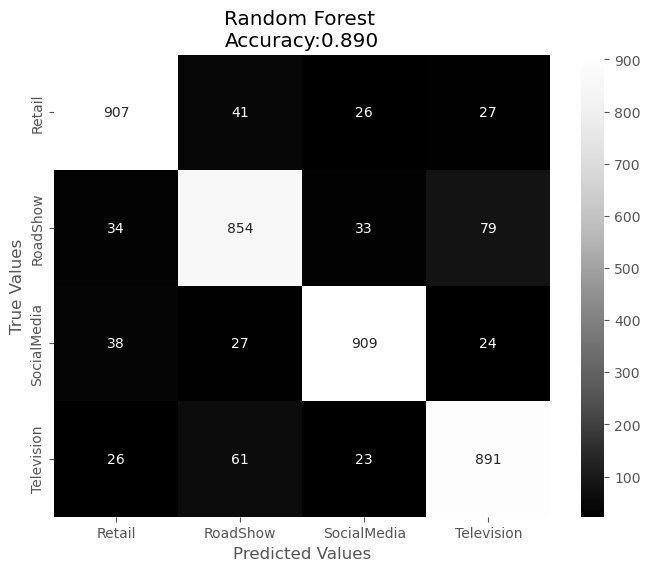

In [341]:
# ues confustion_matrix to understand the accuracy

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = target_names, columns = target_names)

# plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [33]:
# plot
# Random Forest can only plot one tree at a time, so need to set up "nrows" and "ncols" and "estimators_[0]"

import matplotlib.pyplot as plt 
from sklearn import tree

# Plot the decision tree to create the visualisation:
fig, axes = plt.subplots(nrows = 1, ncols =1, figsize=(10, 10),dpi=800)
# add feature_names to clarify the factors.
tree.plot_tree(clf_random_fitted.estimators_[0], fontsize=10, feature_names = X.columns,filled = True)

plt.show()

## Dealing with Class-Imbalanced Data with SMOTE
- One class is dominating the rest of the classes in terms of data points.
- Class inbalance is also seen in fraud detection, anti-money laundering, spam detection, cancer detection etc.
- Goal: using classification on imbalanced data to help classify their customers based on their annual income, 74% of the dataset has people earning less than 50,000 USD, it's a highly imbalanced dataset.

In [34]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data = pd.read_csv('adult.csv')
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [36]:
# Replace ? with NaN using np.nan
data.replace('?',np.nan, inplace=True)

In [37]:
# Drop the rows that contains null values (NaN)
data.dropna(inplace=True)

In [38]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [39]:
# To perform classification, convert categorical values into numerical values
# Use a label encoder for this coversion: Encoding the Categorical values to Numericals using LabelEcoder

from sklearn.preprocessing import LabelEncoder

Labelenc_workclass = LabelEncoder()
data['workclass'] = Labelenc_workclass.fit_transform(data['workclass'])
Labelenc_education = LabelEncoder()
data['education'] = Labelenc_education.fit_transform(data['education'])
Labelenc_marital_status = LabelEncoder()
data['marital-status'] = Labelenc_marital_status.fit_transform(data['marital-status'])
Labelenc_occupation = LabelEncoder()
data['occupation'] = Labelenc_occupation.fit_transform(data['occupation'])
Labelenc_relationship = LabelEncoder()
data['relationship'] = Labelenc_relationship.fit_transform(data['relationship'])
Labelenc_race = LabelEncoder()
data['race'] = Labelenc_race.fit_transform(data['race'])
Labelenc_gender = LabelEncoder()
data['gender'] = Labelenc_gender.fit_transform(data['gender'])
Labelenc_native_country = LabelEncoder()
data['native-country'] = Labelenc_native_country.fit_transform(data['native-country'])
Labelenc_income = LabelEncoder()
data['income'] = Labelenc_income.fit_transform(data['income'])

- a machine learning model will always predict a number as an output rather
than the class directly
- will have to decode it back to the corresponding income class (less than or
equal to 50,000 and greater than 50K, respectively)

In [40]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [41]:
X = data.drop(['income'], axis=1)
y = data['income']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=123)

In [43]:
clf_random = RandomForestClassifier(random_state=0)
clf_random.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [44]:
y_pred=clf_random.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6808
           1       0.74      0.63      0.68      2237

    accuracy                           0.85      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.85      0.85      9045



can infer that the model was able to classify 
- class 0 (less than or equal
to 50,000) with 88% precision 
- class 1 (greater than 50,000) had a precision of 74%

class 1 (greater than 50,000) has a lower score in terms of both precision and
recall. This can be attributed to the fact that the dataset was highly imbalanced,
and this has led to the poor performance of the model.

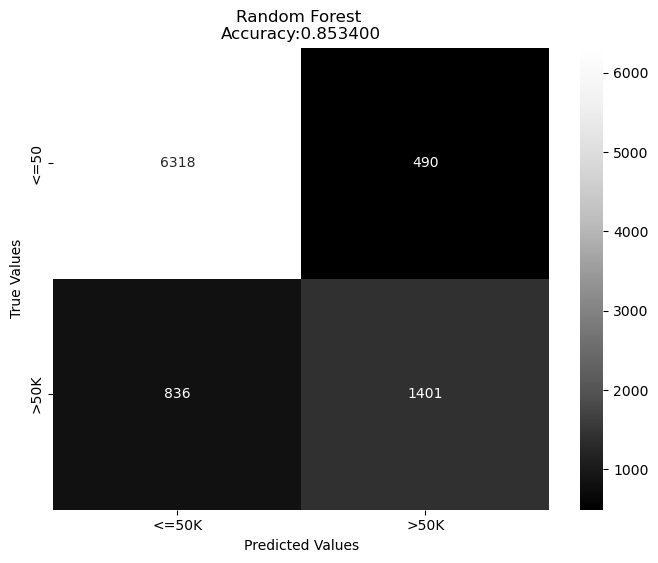

In [46]:
# use confusion_matrix to understand the accuracy

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index=['<=50','>50K'], columns=['<=50K','>50K'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g',cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:3f}'.format(accuracy_score(y_test,y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In [47]:
# Use 'class_weight' to balance data

clf_random = RandomForestClassifier(n_estimators=20, \
max_depth=None, \
min_samples_split=7, \
random_state=0, \
class_weight='balanced')

- class_weight='balanced' ensures that the penalty for each wrong prediction is adjusted based on the distribution of the class. 
- For example, for a majority class, smaller modifications would be done to the weights since you would encounter
samples for the majority class more often as compared to the minority class.

There are other strategies to deal with imbalanced data as well. Some of them are
as follows:
- Random undersampling: In the case of random undersampling, the majority
class samples are randomly eliminated to maintain class balance. The advantage
of using this method is that it reduces the number of training samples, and
hence the training time decreases; however, it may lead to underfitted models.
- Random oversampling: In the case of random oversampling, the minority class
samples are replicated randomly to represent a higher representation of the
minority class in the training sample. The advantage of using this method is that
there is no information loss; however, it may lead to overfitting of the data.
- Synthetic Minority Oversampling Technique (SMOTE): This technique is used
to mitigate the problems you faced in random oversampling. In this method,
a subset of the minority class data is taken, and a similar replica of the data
is created, which is added to the main datasets. The advantage of using this
method is that it reduces overfitting the data and does not lead to any loss of
information. However, it is not very effective for high-dimensional data.

in the case of SMOTE, new samples will be generated based on (but
not exactly the same as) the already existing samples. Random undersampling ends
up reducing the total data size, which can lead to information loss and underfitting:

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [50]:
clf_random.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', min_samples_split=7,
                       n_estimators=20, random_state=0)

In [51]:
y_pred = clf_random.predict(X_test) 

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6808
           1       0.67      0.70      0.69      2237

    accuracy                           0.84      9045
   macro avg       0.79      0.79      0.79      9045
weighted avg       0.84      0.84      0.84      9045



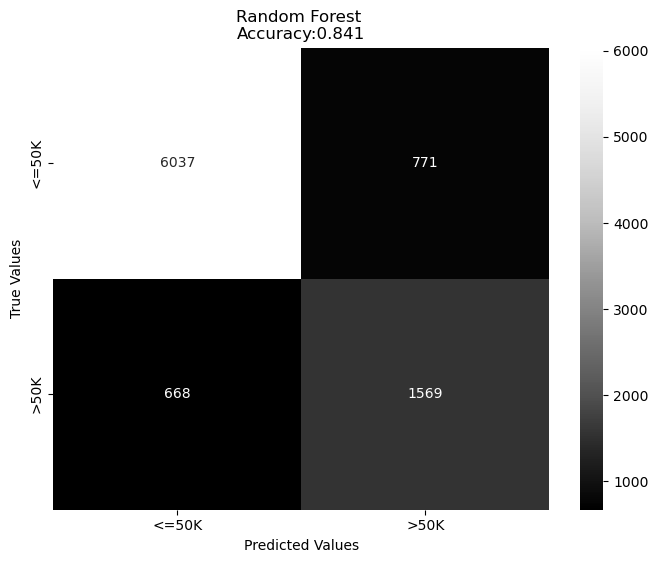

In [53]:
# use confusion_matrix to understand the accuracy

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm,\
index = ['<=50K', '>50K'],\
columns = ['<=50K', '>50K'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'\
.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

## Dealing with Imbalanced Data Using scikit-learn

In [54]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,\
confusion_matrix,\
accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [55]:
# The dataset has values separated by a semicolon, instead of the commonly used comma. 
# That's why you will have to provide sep=';'

bank = pd.read_csv('bank.csv',sep = ';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [56]:
# Rename Y to Target
bank = bank.rename(columns={'y':'Target'})

In [57]:
bank['Target'] = bank['Target'].replace({'no':0, 'yes':1})

In [58]:
bank.shape
# meaning 4334 rows and 17 features 

(4334, 17)

In [59]:
bank.isnull().values.any()

False

In [60]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous,Target
count,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000
mean,40.991924,1410.637517,15.913936,264.544301,2.806876,39.670974,0.544070,0.115828
std,10.505378,3010.612091,8.216673,260.642141,3.129682,99.934062,1.702219,0.320056
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,67.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,440.000000,16.000000,186.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1464.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [62]:
# use the describe function to check the categorical values by passing the include = ['O'] argument to the function

bank.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,4334,4334,4334,4334,4334,4334,4334,4334,4334
unique,12,3,3,2,2,2,3,12,4
top,management,married,secondary,no,yes,no,cellular,may,unknown
freq,942,2680,2306,4261,2476,3650,2801,1339,3555


- the number of unique values in each feature ranges from 2 to 12. 
- need to convert these categorical columns into numerical columns by replacing these categories with numbers. 
- but before that, check the distribution of samples in the class labels. This will complete the statistical description of the dataset.

In [63]:
bank['Target'].value_counts(0)
# meaning it's an inbalanced dataset

0    3832
1     502
Name: Target, dtype: int64

In [65]:
# use the cat.codes function to encode the job, marital, default, housing, loan, contact, and poutcome columns

bank["job"] = bank["job"].astype('category').cat.codes
bank["marital"] = bank["marital"].astype('category').cat.codes
bank["default"] = bank["default"].astype('category').cat.codes
bank["housing"] = bank["housing"].astype('category').cat.codes
bank["loan"] = bank["loan"].astype('category').cat.codes
bank["contact"] = bank["contact"].astype('category').cat.codes
bank["poutcome"] = bank["poutcome"].astype('category').cat.codes

In [66]:
# since education and month are ordinal columns, convert them as follows:

bank['education'].replace({'primary': 0, 'secondary': 1,\
'tertiary':2}, inplace= True)
bank['month'].replace(['jan', 'feb', 'mar','apr','may','jun',\
'jul', 'aug', 'sep','oct','nov','dec'], \
[1,2,3,4,5,6,7,8,9,10,11,12], \
inplace = True)

In [67]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,5,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,4,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,5,226,1,-1,0,3,0


In [68]:
target = 'Target'
X = bank.drop(['Target'], axis=1)
y = bank[target]

X_train, X_test, y_train, y_test = train_test_split\
(X,y,test_size=0.15, \
random_state=123, \
stratify=y)

In [69]:
y_train.value_counts()

0    3256
1     427
Name: Target, dtype: int64

In [70]:
y_test.value_counts()

0    576
1     75
Name: Target, dtype: int64

In [445]:
pip install standard-scaler

Note: you may need to restart the kernel to use updated packages.


In [71]:
# scale the training and test set features to remove any effect of different orders of 
# magnitude of mean, minimum, maximum, and standard deviation for these features
# StandardScaler is to transform your data such that its distribution will have a mean value 0 and standard deviation of 1. 
# In case of multivariate data, this is done feature-wise (in other words independently for each column of the data)

import sklearn

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [72]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=7, random_state=0)

In [73]:
clf_random.fit(X_train_sc, y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [74]:
y_pred = clf_random.predict(X_test_sc)

In [75]:
# Input column name
target_names = ['No','Yes']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

          No       0.93      0.97      0.95       576
         Yes       0.64      0.40      0.49        75

    accuracy                           0.90       651
   macro avg       0.78      0.69      0.72       651
weighted avg       0.89      0.90      0.89       651



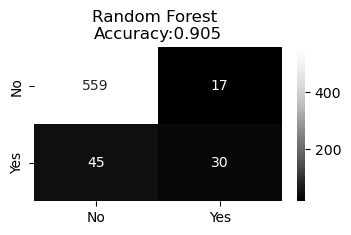

In [76]:
cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(cm, index = ['No','Yes'], columns = ['No', 'Yes'])
plt.figure(figsize=(4,2))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel=('Ture Values')
plt.xlabel=('Predicted Values')
plt.show()

In [78]:
# use SMOTE() to resample the dataset to remove the class imbalance from the training set

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

In [80]:
# use standard_scaler to scale the resampled dataset

scaler = StandardScaler()
X_train_sc_resampled = scaler.fit_transform(X_resampled)
X_test_sc_resampled = scaler.transform(X_test)

In [81]:
clf_random.fit(X_train_sc_resampled, y_resampled)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [82]:
RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [83]:
y_pred=clf_random.predict(X_test_sc_resampled)

In [84]:
target_names = ['No','Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.94      0.91      0.93       576
         Yes       0.46      0.59      0.51        75

    accuracy                           0.87       651
   macro avg       0.70      0.75      0.72       651
weighted avg       0.89      0.87      0.88       651



The main point to note in the preceding output is the increased values of the
precision, recall, and F1 scores for the Yes class label, which shows the impact of
balancing the dataset on the model performance.

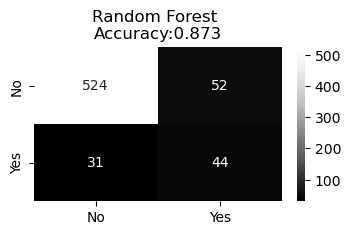

In [87]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,\
index = ['No', 'Yes'], \
columns = ['No', 'Yes'])
plt.figure(figsize=(4,2))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
# plt.ylabel('True Values')
# plt.xlabel('Predicted Values')
plt.show()

Yes vs. Yes increased to 44, showing the importance of balancing an inbalanced dataset

### Recap the steps:
- First, explore the dataset and realized the need for scaling the data
- Next, transform the categorical columns into numerical columns to make the processing easy. 
- Once dataset is ready to use, train a random forest classifier. The low performance for the minor class clearly showed the need for class balancing.
- After resampling the dataset using the SMOTE technique, the class imbalance is reduced, then again train a random forest classifier
- The final model performance showed a significant increase for the minor class. All these steps are commonly used based on the dataset and the problem statement.

In [90]:
# understand the importance of each feature
# 'duration' is the most important feature for customers to retain/switch a bank account 

features = X.columns
importance = clf_random.feature_importances_
table = pd.DataFrame()
table['features'] = features
table['importance'] = importance
table.sort_values('importance', ascending = False)

,features,importance
11,duration,0.333293
6,housing,0.109359
10,month,0.067739
13,pdays,0.065940
8,contact,0.064703
5,balance,0.061310
1,job,0.052431
9,day,0.050664
0,age,0.044710
15,poutcome,0.037290
